In [51]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [2]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

#### Checking for NULL Values

In [4]:
X.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

#### CHecking the distribution of data across various columns

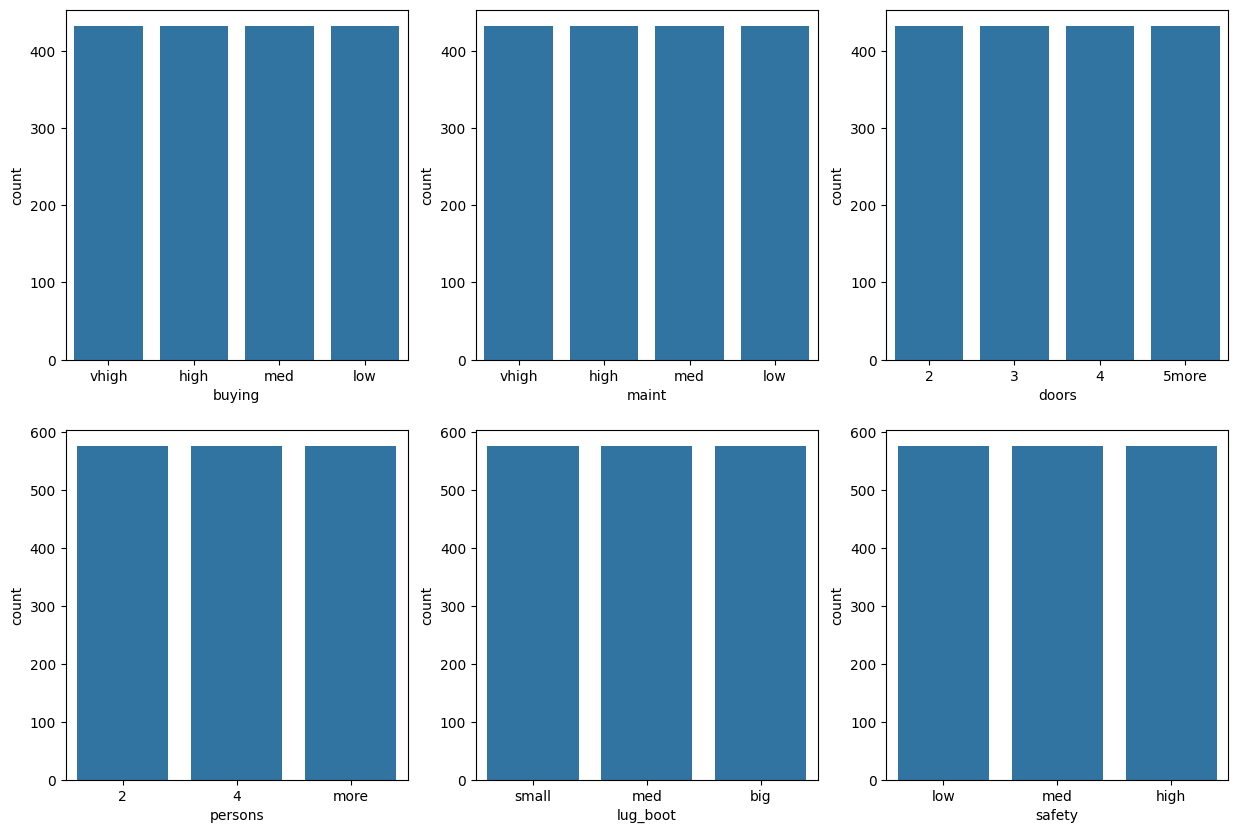

In [5]:
fig,ax = plt.subplots(2,3,figsize=(15,10))
i=0
j=0
for col in X.columns:
    sns.countplot(ax=ax[i][j],data=X,x=col)
    j+=1
    if j==3:
        i=1
        j=0

<Axes: title={'center': 'Class Distribution'}, xlabel='class', ylabel='count'>

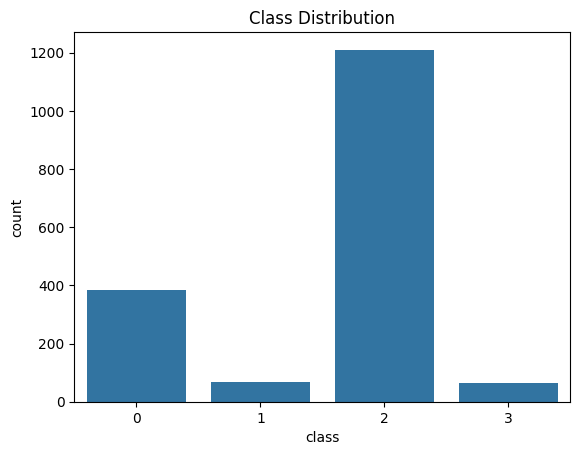

In [66]:
plt.title("Class Distribution")
sns.countplot(data=y,x='class')

#### Label Encoding Categorical Values

In [52]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
   
X['buying']= label_encoder.fit_transform(X['buying']) 
X['maint']= label_encoder.fit_transform(X['maint']) 
X['doors']= label_encoder.fit_transform(X['doors']) 
X['persons']= label_encoder.fit_transform(X['persons']) 
X['lug_boot']= label_encoder.fit_transform(X['lug_boot']) 
X['safety']= label_encoder.fit_transform(X['safety'])

y['class']=label_encoder.fit_transform(y['class'])

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df_encoded=df.copy()
df_encoded=df.apply(label.fit_transform())
df_encoded

#### Plotting Correlation Matrix

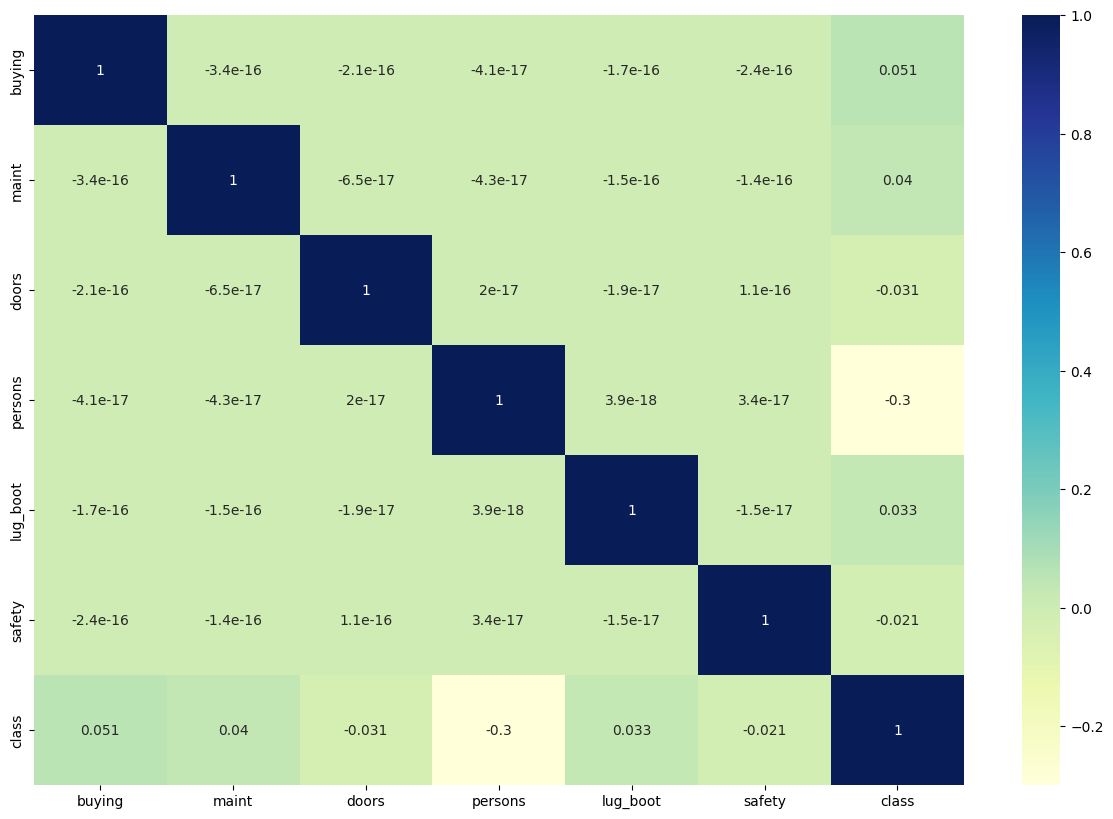

In [53]:
df = pd.concat([X, y], axis=1)
# print(df.corr())  
plt.figure(figsize=(15,10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)  
plt.show()

#### Taking all positive values

In [54]:
Pos=X.copy()
Pos=Pos.drop(["doors","persons","safety"],axis=1)

In [55]:
Neg=X.copy()
Neg=Neg.drop(["buying","maint","lug_boot"],axis=1)

#### Train-Test-Split

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)
X_train_pos, X_test_pos, y_train_pos, y_test_pos =train_test_split(Pos, y, test_size=0.2)
X_train_neg, X_test_neg, y_train_neg, y_test_neg =train_test_split(Neg, y, test_size=0.2)

In [67]:
neighbors=[2,3,4,5,6,7,8,9,10,11]
accurate=[]
y_pred_arr=list()
accurate_pos=[]
y_pred_arr_pos=list()
accurate_neg=[]
y_pred_arr_neg=list()

In [68]:
from sklearn.metrics import accuracy_score

#### Applying KNN Algorithms

In [69]:
from sklearn.neighbors import KNeighborsClassifier
for neighbor in neighbors:
    model= KNeighborsClassifier(n_neighbors=neighbor,weights='distance')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    accurate.append(accuracy)
    y_pred_arr.append(y_pred)
    model= KNeighborsClassifier(n_neighbors=neighbor,weights='distance')
    model.fit(X_train_pos,y_train_pos)
    y_pred=model.predict(X_test_pos)
    accuracy=accuracy_score(y_test_pos,y_pred)
    accurate_pos.append(accuracy)
    y_pred_arr_pos.append(y_pred)
    model= KNeighborsClassifier(n_neighbors=neighbor,weights='distance')
    model.fit(X_train_neg,y_train_neg)
    y_pred=model.predict(X_test_neg)
    accuracy=accuracy_score(y_test_neg,y_pred)
    accurate_neg.append(accuracy)
    y_pred_arr_neg.append(y_pred)

#### Accuracy vs Neighbors Graph

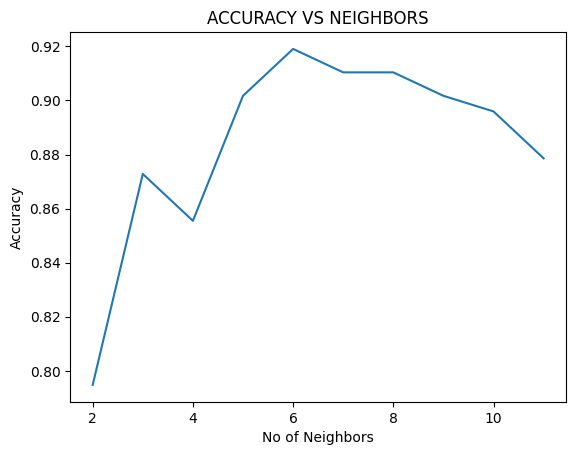

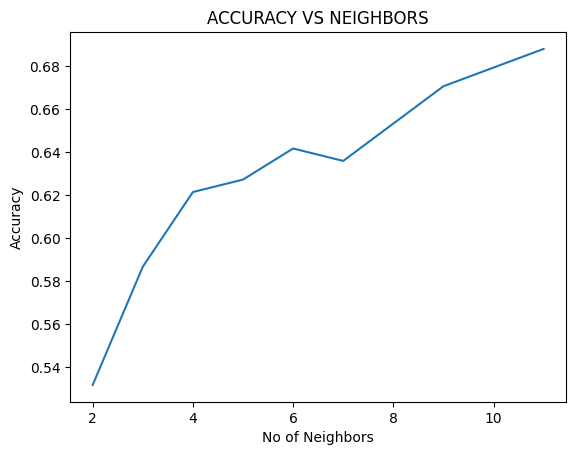

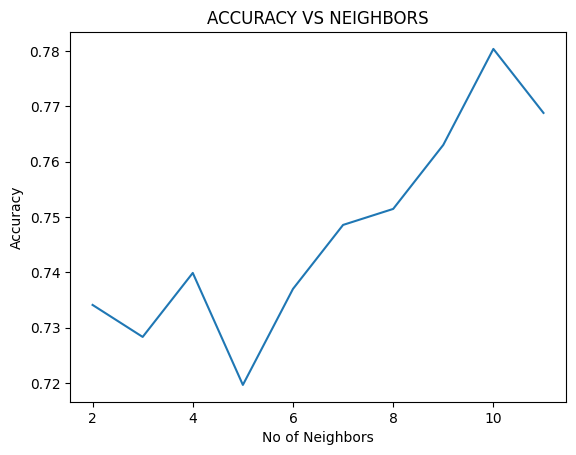

In [74]:
plt.xlabel("No of Neighbors")
plt.ylabel("Accuracy")
plt.title("ACCURACY VS NEIGHBORS")
plt.plot(neighbors,accurate)
plt.show()
plt.xlabel("No of Neighbors")
plt.ylabel("Accuracy")
plt.title("ACCURACY VS NEIGHBORS")
plt.plot(neighbors,accurate_pos)
plt.show()
plt.xlabel("No of Neighbors")
plt.ylabel("Accuracy")
plt.title("ACCURACY VS NEIGHBORS")
plt.plot(neighbors,accurate_neg)
plt.show()

#### Generating accuracy and Metrics

##### Classification Report

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_arr[5]))
print(classification_report(y_test, y_pred_arr_pos[5]))
print(classification_report(y_test, y_pred_arr_neg[5]))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        89
           1       0.71      0.42      0.53        12
           2       0.93      0.99      0.96       228
           3       1.00      0.76      0.87        17

    accuracy                           0.91       346
   macro avg       0.88      0.74      0.80       346
weighted avg       0.91      0.91      0.91       346

              precision    recall  f1-score   support

           0       0.23      0.10      0.14        89
           1       0.06      0.08      0.07        12
           2       0.67      0.85      0.75       228
           3       0.00      0.00      0.00        17

    accuracy                           0.59       346
   macro avg       0.24      0.26      0.24       346
weighted avg       0.50      0.59      0.53       346

              precision    recall  f1-score   support

           0       0.15      0.17      0.16        89
           1       0.

##### Confusion Matrix

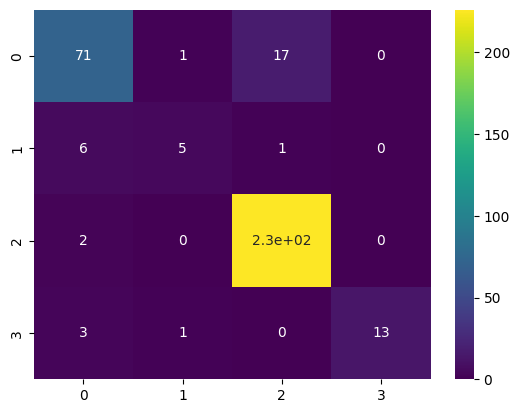

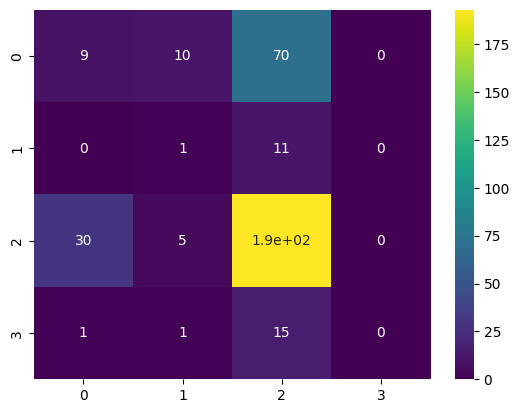

<Axes: >

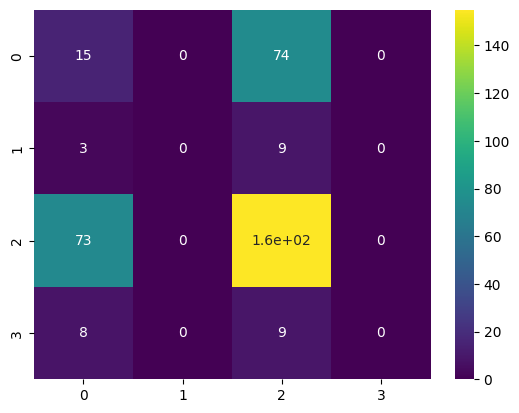

In [63]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_arr[5])
sns.heatmap(confusion_matrix,annot=True,cmap='viridis')
plt.show()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_arr_pos[5])
sns.heatmap(confusion_matrix,annot=True,cmap='viridis')
plt.show()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_arr_neg[5])
sns.heatmap(confusion_matrix,annot=True,cmap='viridis')